# Aprendizaje de refuerzo

**El aprendizaje de refuerzo es aprender qué hacer con el fin de maximizar una señal de recompensa numérica.** Al agente no se le dice qué acciones tomar, sino que debe descubrir qué acciones producen la mayor recompensa al probarlas. Así, tiene que explotar lo que ya ha experimentado para obtener la recompensa, pero también tiene que explorar para hacer mejores selecciones de acción en el futuro. Es importante tener claro que:

> `Todos los agentes de aprendizaje de refuerzo tienen objetivos explícitos, pueden sentir aspectos de sus entornos, y puede elegir acciones para influir en sus entornos.`

Una señal de recompensa define el objetivo de un problema de aprendizaje de refuerzo. *En cada momento, el entorno envía al agente un solo número llamado la recompensa.* El único objetivo del agente es maximizar la recompensa total que recibe a largo plazo.

Mientras que la señal de recompensa indica lo que es bueno en un sentido inmediato, **un valor función específica lo que es bueno en el largo plazo.** En términos generales, el valor de un estado es la cantidad total de recompensa que un agente puede esperar acumular en el futuro, comenzando de ese estado. Mientras que las recompensas determinan la conveniencia inmediata e intrínseca de estados.

# K-Armed Bandit Problem

Repetidamente se enfrenta con una elección entre k diferentes opciones, o acciones. *Después de cada elección se recibe una recompensa numérica elegido de una distribución de probabilidad estacionaria que depende de la acción seleccionada.* Su el objetivo es maximizar la recompensa total esperada durante algún tiempo, por ejemplo, más de 1000 selecciones de acción, o pasos de tiempo.

En este problema, cada una de las acciones k, palancas, tiene una recompensa esperada o media, esto será referido como el valor de la acción. Si definimos $A_t$ como la acción tomada en el paso de tiempo $t$, $R_t$ la recompensa percieved correspondiente, y $q_*(a)$ el valor mencionado de una acción particular a, entonces la siguiente ecuación representa la dinámica de los valores de acción.

> $$
q_*(a) = {E}[R_t| A_t = a]
$$

> *Conocer los valores de todas las acciones haría de esto un problema trivial, siempre seleccionando el valor más alto de $q_*(a)$ para maximizaría la recompensa general.*

Pero, estos valores son desconocidos. Sin embargo, puede haber estimaciones que se representarán como $Q_t(a)$, a través del proceso de capacitación el objetivo es calibrar $Q_t(a)$ para que esté lo más cerca posible de $q_*(a)$ .

Considerando las estimaciones en un paso dado $t$, una de las acciones tendrá el valor estimado más alto. Estas son referidas como acciones *codiciosas*. La metodología para evaluar las acciones y tomar solo los *codiciosos* es **explotar** el conocimiento actual de los valores de acción. Explotar las acciones codiciosas maximizará el retorno esperado en el paso de tiempo actual. 

Por otro lado, al elegir acciones no codiciosas, el agente estará **explorando** el medio ambiente. La exploración promoverá la recolección de nueva información de estados no codiciosos y puede mejorar la recompensa general a largo plazo. La recompensa es menor en el corto plazo cuando se explora el espacio de acción y estado, pero puede conducir a una mayor recompensa en el largo plazo, ya que permite descubrir acciones con mayor valor desconocido antes. 

> *Dado que es imposible hacer ambas cosas simultáneamente, esto se conoce como conflicto de exploración-explotación o compensación.*

## Métodos de Acción-Valor

Los métodos de acción-valor buscan estimar el valor de las acciones y usar las estimaciones para tomar decisiones de selección de acciones. **Teniendo en cuenta que el valor de una acción es la recompensa esperada cuando se selecciona esa acción, una forma natural de estimar el valor es promediando las recompensas realmente recibidas**. Esto se muestra en la siguiente expresión, donde $ {1}_{A_i=a}$ es una función indicadora que indica con una variable binaria si la condición ($A_i=a$ en este caso) es verdadera o no. 

$$
Q_t(a)=\frac{sum \space of \space rewards \space when \space a \space taken \space prior \space to \space t}{number \space of \space times \space a \space taken \space prior \space to \space t} = \frac{\sum_{i=1}^{t-1}{R_i*\mathbb{1}_{A_i=a}}}{\sum_{i=1}^{t-1}{\mathbb{1}_{A_i=a}}}
$$

Si el denominador de la función es 0, significando que $a$ no ha sido elegido todavía, entonces $Q_t(a)$ es inicializado arbitrariamente. Cuando el denominador va al infinito, entonces $Q_t(a)$ converge a $q_*(a)$. Esto se denomina método **promedio de muestra** para estimar los valores de acción, debido a la naturaleza de promediación de la estimación. 

La regla de selección de acción más simple es seleccionar la que tiene el valor más alto, definida como acciones codiciosas antes. Si hay más de una acción *codiciosa*, entonces una de ellas se selecciona de forma arbitraria, quizás aleatoria. El *codicioso* método de selección de acción se escribe como

$$
A_t = arg max_a{Q_t(a)}
$$

Como es de esperar, el método de selección de acciones *greedy* explota la información conocida, ignorando si otras acciones aparentemente inferiores son realmente mejores. Una alternativa simple es seleccionar acciones con avidez la mayor parte del tiempo, pero de vez en cuando, seleccione aleatoriamente de todas las acciones posibles con la misma probabilidad. **Cuando las acciones no codiciosas se eligen con $ epsilon$ probabilidad, estos se llaman métodos $ epsilon-greedy$.**

## Implementación incremental

En el método sample-averge mencionado anteriormente, se puede hacer un ajuste en los cálculos para ahorrar memoria a lo largo de los pasos de tiempo. En el cálculo inicial, todas las recompensas recibidas deben almacenarse para calcular el promedio. Sin embargo, reordenar los términos: 

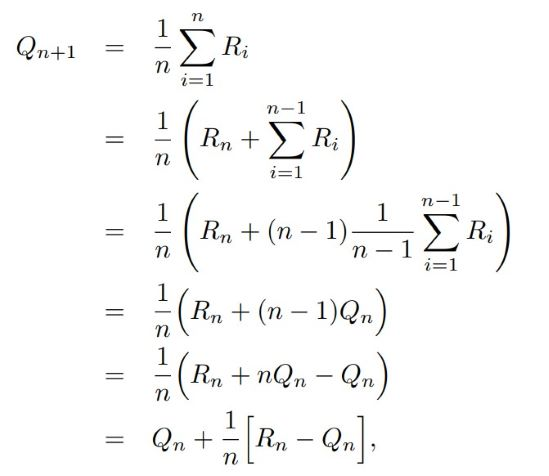

En esta nueva implementación, solo se requiere memoria para almacenar $n$ y $Q_n$ para hacer un cálculo simple al actualizar una estimación. La forma general de esto se muestra a continuación, donde $[Target + Old space Estimate]$ es el error en la estimación.

$$
New \space Estimate = Old \space Estimate + Step \space Size \space [Target - Old \space Estimate]
$$

El tamaño de paso utilizado en el método incremental cambia en el tiempo. En el procesamiento de la décima recompensa por la acción a, el método utiliza el parámetro step-size $\frac{1}{n}$. El tamaño del paso será denotado por $\alpha$ o, más generalmente, por $\alpha_t(a)$.

# Ejercicio 1

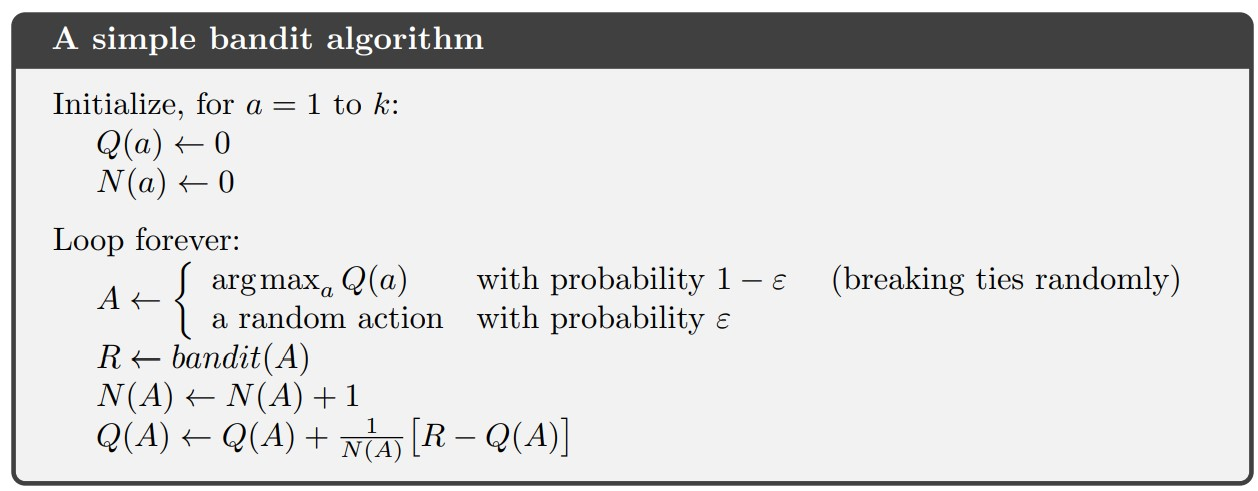

In [1]:
# Use la libreria Numpy para tener acceso a funciones/operaciones mateamticas.
import numpy as np

# Use matplotlib para graficar
import matplotlib.pyplot as plt

In [2]:
# Definición de parametros básicos
#     1. k ~ # de palancas (usar 15)
#     2. e ~ epsilon, probablidad de busqueda (usar 0.15)
#     3. q_* ~ retorno esperado de las palancas (usar una lista y distribución normal estandar para obtener un valor aleatorio como ESPERADO)
#     4. n_steps ~ Número de pasos que debe dar el algoritmo (usar 10000)
#     5. Q(a) ~ Inicializar en 0 para cada acción (en este caso tiene k acciones). Usar un diccionario para representarlo.
#     6. N(a) ~ Número de veces que ha salido cada acción. Usar un diccionario para representarlo.

k = 15
e = 0.15
n_steps = 10000

q = list(np.random.normal(0,1,k))
Q = {a:0 for a in range(k)}
N = {a:0 for a in range(k)}

In [3]:
# ... Implementación del Epsilon- Greedy con base al pseudocodigo.
#
#  I. Vaya por todos los momentos 't'
#
#  II. Escoja entre explotar o explorar
#           OJO --> Si hay dos iguales para explotar, escoja de manera aleatoria entre ambas
#           HINT's: Revise numpy.random.[choice, random, normal]
#
#  III. Actualice la información
#
#  IV. Reporte resultados ~ La idea es ver convergencia entre q_* y Q_a

for t in range(n_steps):

  # Exploration
  if np.random.random() <= e:
    A = np.random.choice(range(k))

  # Exploitation
  else:

    v_max = np.max(list(Q.values()))
    maxs = [i for i,j in Q.items() if j == v_max]

    A = np.random.choice(maxs)

  # Perceiving the reward
  R = np.random.normal(q[A],1)
    
  # Updating number of times the bandit has been chosen
  N[A] +=1
    
  # Updating estimate
  Q[A] = Q[A] + (1/N[A]) * (R - Q[A])

# RESULTS
for a in range(k):
  print(f"Esperado: {round(q[a], 4)}  vs Estimado {round(Q[a], 4)}")

Esperado: -0.9016  vs Estimado -1.0475
Esperado: -0.2717  vs Estimado -0.2589
Esperado: 0.4319  vs Estimado 0.4034
Esperado: 0.0347  vs Estimado 0.0858
Esperado: 0.339  vs Estimado 0.292
Esperado: 1.0325  vs Estimado 1.0231
Esperado: -0.0724  vs Estimado 0.0872
Esperado: -0.0228  vs Estimado -0.131
Esperado: -0.6708  vs Estimado -0.6579
Esperado: 0.2026  vs Estimado 0.0684
Esperado: -0.5212  vs Estimado -0.4155
Esperado: -0.1286  vs Estimado -0.026
Esperado: -0.6127  vs Estimado -0.7361
Esperado: -1.1516  vs Estimado -1.0818
Esperado: 0.2477  vs Estimado 0.1757


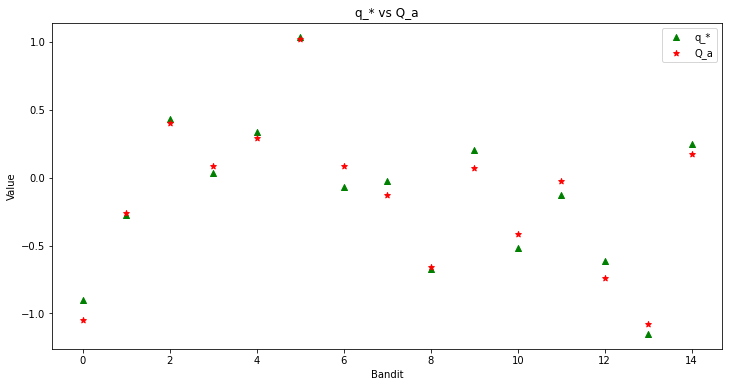

In [4]:
# Graficar q_* y Q_a como lineas/puntos para ver que tan cerca entan entre cada uno la convergencia

plt.figure(figsize=(12,6))

plt.scatter(range(k), q, color='green', marker= '^')
plt.scatter(range(k), Q.values(), color='red', marker= '*')

plt.title('q_* vs Q_a')
plt.xlabel('Bandit')
plt.ylabel('Value')
plt.legend(['q_*', 'Q_a'], loc = 'upper right')

plt.show()

# Ejercicio 2

Corra 1000 iteraciones del problema anterior. En este caso, una iteración del aterior ejercicio se le conoce como episodio. Buscamos ver el resultado luego de muchos episodios, graficando para cada episodio el retorno acumulado. Use solo 1000 pasos por episodio.

In [5]:
# I. Declare que el número de pasos es solo 1000
# II. Declare la cantidad de episodios que va a usar (2000)
# III. Declare una estructura para guardar el retorno de cada episodio.

# IV. Recorra cada uno de los episodios. 
# V. En cada episodio declare q, Q, y N como en el ejercicio 1.

# VI. Realice lo mismo del ejercicio 1, pero asegurese de guardar el retorno de cada paso, con el fin de acumular el retorno total de los episodios para dicho paso.
# VII. Estandirece el retorno total de cada episodio con base en numero de simulaciones.


n_steps = 1000
num_simulations = 2000
Q_Reward = {t:0 for t in range(n_steps)}

for ep in range(num_simulations):

  q = list(np.random.normal(0,1,k))
  Q = {a:0 for a in range(k)}
  N = {a:0 for a in range(k)}

  for t in range(n_steps):

    # Exploration
    if np.random.random() <= e:
      A = np.random.choice(range(k))

    # Exploitation
    else:

      v_max = np.max(list(Q.values()))
      maxs = [i for i,j in Q.items() if j == v_max]

      A = np.random.choice(maxs)

    # Perceiving the reward
    R = np.random.normal(q[A],1)

    # Updating number of times the bandit has been chosen
    N[A] += 1

    # Updating estimate
    Q[A] = Q[A] + (1/N[A]) * (R - Q[A])

    # NEW: Save acumulative reward
    Q_Reward[t] += R

# NEW: Avg reward in each episode
Avg_egreedy = [Q_Reward[t]/num_simulations for t in range(n_steps)]

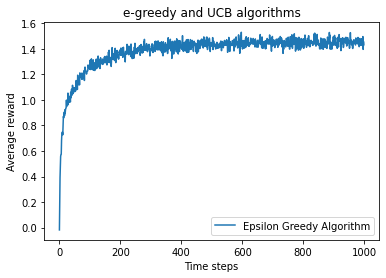

In [6]:
# Graficar la tendencia del retorno en cada paso.

plt.plot(range(n_steps), Avg_egreedy, label = "Epsilon Greedy Algorithm")
plt.xlabel('Time steps');  plt.ylabel('Average reward');   plt.title('e-greedy and UCB algorithms')

plt.legend()
plt.show() 

# Ejercicio 3

Modifique el ejercicio dos para usar Upper-Confidence-Bound Action Selection. (Use un c=2)

1. Haga un breve resumen de dicha sección.
2. Realice los cambios sobre el código. 
3. Grafique los resultados vs el Ejercicio 2 y concluya.

In [16]:
Q_Reward = {t:0 for t in range(n_steps)}

for ep in range(num_simulations):

  q = list(np.random.normal(0,1,k))
  Q = {a:0 for a in range(k)}
  N = {a:0 for a in range(k)}

  for t in range(n_steps):

    # Exploration
    if np.random.random() <= e:
      
          # UCB
          UCB = {}
          boolean = False
      
          for a in Q.keys():
          
              if N[a] == 0:     
                A = a;    boolean = True
              else:    
                UCB[a] = Q[a] + 2 * ((np.log(t) / N[a]) ** (1/2))
      
          if not boolean:    
            i = list(UCB.values()).index(max(list(UCB.values())))
            A = list(UCB.keys())[i]

    # Exploitation
    else:

      v_max = np.max(list(Q.values()))
      maxs = [i for i,j in Q.items() if j == v_max]

      A = np.random.choice(maxs)

    # Perceiving the reward
    R = np.random.normal(q[A],1)

    # Updating number of times the bandit has been chosen
    N[A] += 1

    # Updating estimate
    Q[A] = Q[A] + (1/N[A]) * (R - Q[A])

    # NEW: Save acumulative reward
    Q_Reward[t] += R

# NEW: Avg reward in each episode
Avg_UCB = [Q_Reward[t]/num_simulations for t in range(n_steps)]

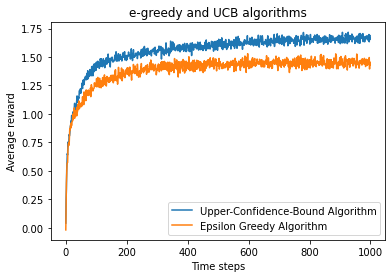

In [17]:
plt.plot(range(n_steps), Avg_UCB, label = "Upper-Confidence-Bound Algorithm")
plt.plot(range(n_steps), Avg_egreedy, label = "Epsilon Greedy Algorithm")

plt.xlabel('Time steps');  plt.ylabel('Average reward');   plt.title('e-greedy and UCB algorithms')
plt.legend()
plt.show() 